In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('jayaantanaath/student-habits-vs-academic-performance'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv("/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv")
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

In [3]:
df.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


student_id        age  gender  study_hours_per_day  social_media_hours  \
count        1000  1000.0000    1000           1000.00000         1000.000000   
unique       1000        NaN       3                  NaN                 NaN   
top         S1000        NaN  Female                  NaN                 NaN   
freq            1        NaN     481                  NaN                 NaN   
mean          NaN    20.4980     NaN              3.55010            2.505500   
std           NaN     2.3081     NaN              1.46889            1.172422   
min           NaN    17.0000     NaN              0.00000            0.000000   
25%           NaN    18.7500     NaN              2.60000            1.700000   
50%           NaN    20.0000     NaN              3.50000            2.500000   
75%           NaN    23.0000     NaN              4.50000            3.300000   
max           NaN    24.0000     NaN              8.30000            7.200000   

        netflix_hours part_time_job  attendance_percentage  sleep_hours  \
count     1000.000000          1000            1000.000000  1000.000000   
unique            NaN             2                    NaN          NaN   
top               NaN            No                    NaN          NaN   
freq              NaN           785                    NaN          NaN   
mean         1.819700           NaN              84.131700     6.470100   
std          1.075118           NaN               9.399246     1.226377   
min          0.000000           NaN              56.000000     3.200000   
25%          1.000000           NaN              78.000000     5.600000   
50%          1.800000           NaN              84.400000     6.500000   
75%          2.525000           NaN              91.025000     7.300000   
max          5.400000           NaN             100.000000    10.000000   

       diet_quality  exercise_frequency parental_education_level  \
count          1000         1000.000000                      909   
unique            3                 NaN                        3   
top            Fair                 NaN              High School   
freq            437                 NaN                      392   
mean            NaN            3.042000                      NaN   
std             NaN            2.025423                      NaN   
min             NaN            0.000000                      NaN   
25%             NaN            1.000000                      NaN   
50%             NaN            3.000000                      NaN   
75%             NaN            5.000000                      NaN   
max             NaN            6.000000                      NaN   

       internet_quality  mental_health_rating extracurricular_participation  \
count              1000           1000.000000                          1000   
unique                3                   NaN                             2   
top                Good                   NaN                            No   
freq                447                   NaN                           682   
mean                NaN              5.438000                           NaN   
std                 NaN              2.847501                           NaN   
min                 NaN              1.000000                           NaN   
25%                 NaN              3.000000                           NaN   
50%                 NaN              5.000000                           NaN   
75%                 NaN              8.000000                           NaN   
max                 NaN             10.000000                           NaN   

         exam_score  
count   1000.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean      69.601500  
std       16.888564  
min       18.400000  
25%       58.475000  
50%       70.500000  
75%       81.325000  
max      100.000000

In [4]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [5]:
for col in df.columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'student_id':
['S1000' 'S1001' 'S1002' 'S1003' 'S1004' 'S1005' 'S1006' 'S1007' 'S1008'
 'S1009' 'S1010' 'S1011' 'S1012' 'S1013' 'S1014' 'S1015' 'S1016' 'S1017'
 'S1018' 'S1019' 'S1020' 'S1021' 'S1022' 'S1023' 'S1024' 'S1025' 'S1026'
 'S1027' 'S1028' 'S1029' 'S1030' 'S1031' 'S1032' 'S1033' 'S1034' 'S1035'
 'S1036' 'S1037' 'S1038' 'S1039' 'S1040' 'S1041' 'S1042' 'S1043' 'S1044'
 'S1045' 'S1046' 'S1047' 'S1048' 'S1049' 'S1050' 'S1051' 'S1052' 'S1053'
 'S1054' 'S1055' 'S1056' 'S1057' 'S1058' 'S1059' 'S1060' 'S1061' 'S1062'
 'S1063' 'S1064' 'S1065' 'S1066' 'S1067' 'S1068' 'S1069' 'S1070' 'S1071'
 'S1072' 'S1073' 'S1074' 'S1075' 'S1076' 'S1077' 'S1078' 'S1079' 'S1080'
 'S1081' 'S1082' 'S1083' 'S1084' 'S1085' 'S1086' 'S1087' 'S1088' 'S1089'
 'S1090' 'S1091' 'S1092' 'S1093' 'S1094' 'S1095' 'S1096' 'S1097' 'S1098'
 'S1099' 'S1100' 'S1101' 'S1102' 'S1103' 'S1104' 'S1105' 'S1106' 'S1107'
 'S1108' 'S1109' 'S1110' 'S1111' 'S1112' 'S1113' 'S1114' 'S1115' 'S1116'
 'S1117' 'S1118' 'S

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv")
# Drop non-informative identifier
df.clean = df.drop(columns=['student_id'])

# Identify categorical columns
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 
                    'parental_education_level', 'internet_quality', 
                    'extracurricular_participation']

# Encode categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df.clean[col] = le.fit_transform(df.clean[col])
    label_encoders[col] = le

# Check the cleaned data
df.clean.head()


/tmp/ipykernel_13/1894738081.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.clean = df.drop(columns=['student_id'])


age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
0   23       0                  0.0                 1.2            1.1   
1   20       0                  6.9                 2.8            2.3   
2   21       1                  1.4                 3.1            1.3   
3   23       0                  1.0                 3.9            1.0   
4   19       0                  5.0                 4.4            0.5   

   part_time_job  attendance_percentage  sleep_hours  diet_quality  \
0              0                   85.0          8.0             0   
1              0                   97.3          4.6             1   
2              0                   94.8          8.0             2   
3              0                   71.0          9.2             2   
4              0                   90.9          4.9             0   

   exercise_frequency  parental_education_level  internet_quality  \
0                   6                         2                 0   
1                   6                         1                 0   
2                   1                         1                 2   
3                   4                         2                 1   
4                   3                         2                 1   

   mental_health_rating  extracurricular_participation  exam_score  
0                     8                              1        56.2  
1                     8                              0       100.0  
2                     1                              0        34.3  
3                     1                              1        26.8  
4                     1                              0        66.4

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target
X = df.clean.drop(columns='exam_score')
y = df.clean['exam_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2


(6.273987012259432, 0.8464959178033369)

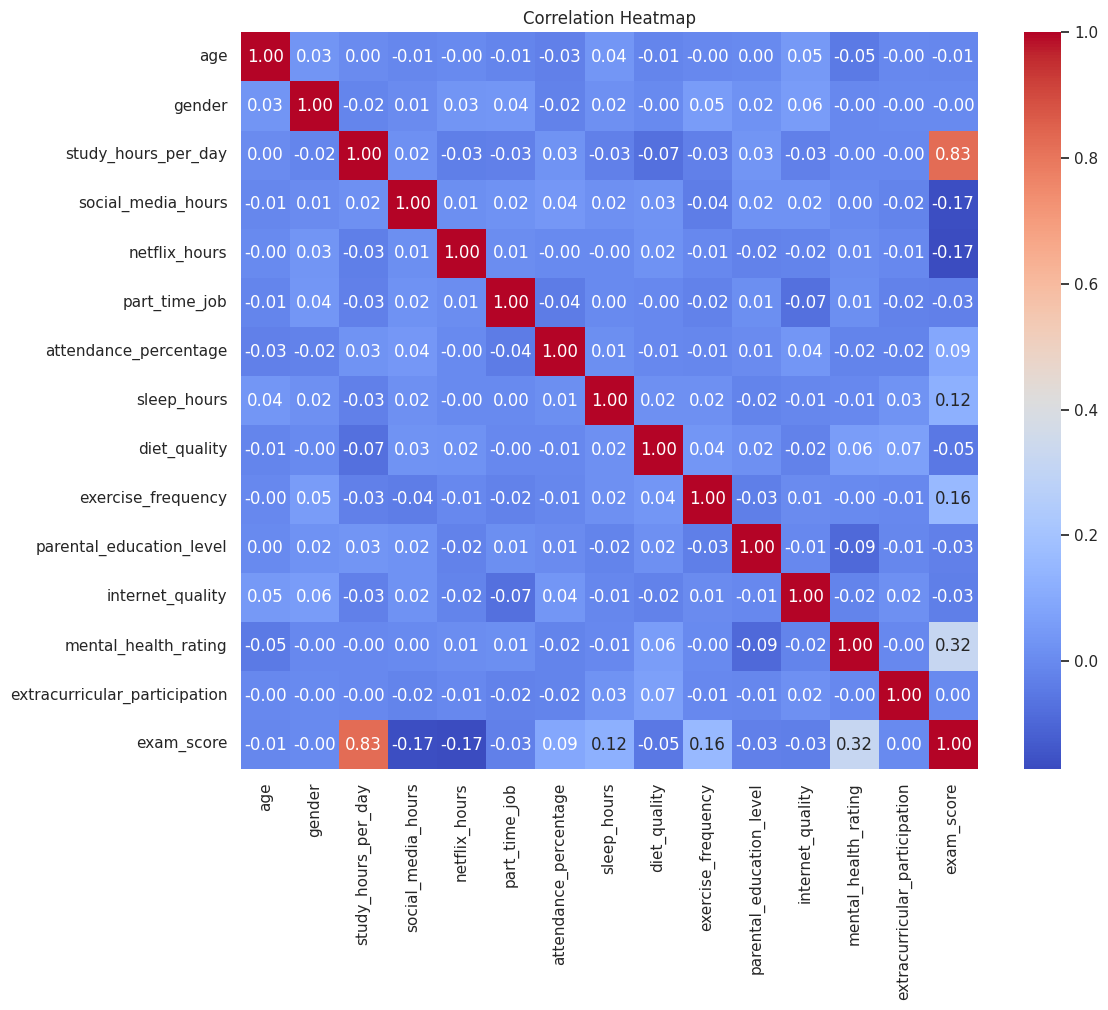

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
corr = df.clean.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


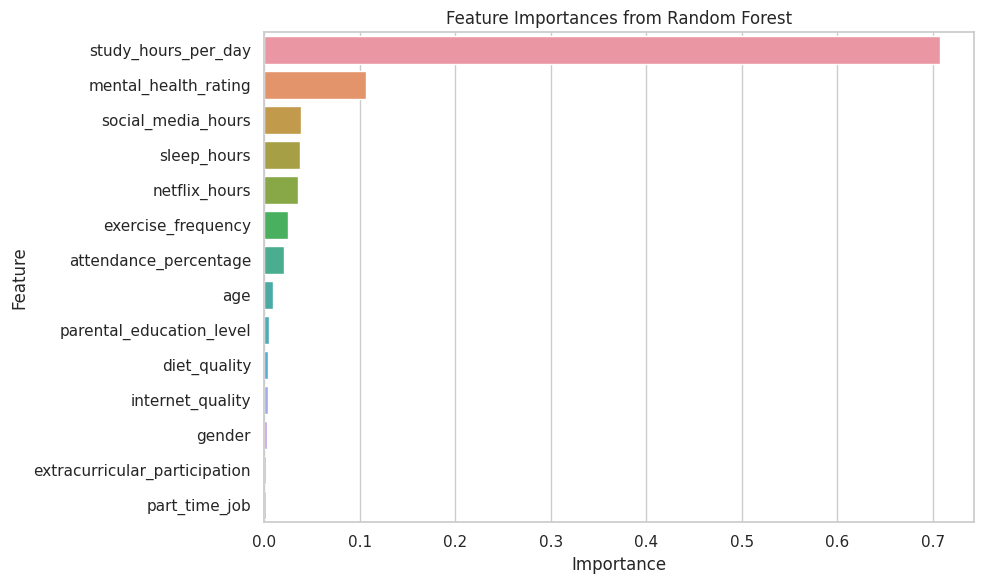

In [9]:
import pandas as pd

importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


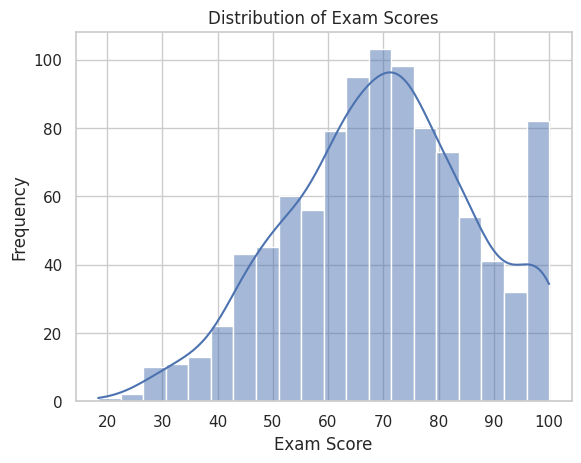

In [10]:
sns.histplot(df.clean['exam_score'], kde=True, bins=20)
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()


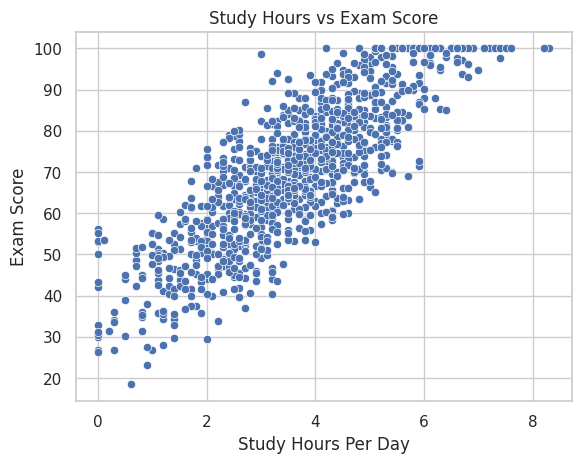

In [11]:
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df.clean)
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours Per Day")
plt.ylabel("Exam Score")
plt.show()
